## Importing Libraries

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Defining Functions and Classes

In [30]:
class BayesClassifier:
    def __init__(self):
        pass

    def fit(self, X_train, y_train):
        self.classes, self.class_counts = np.unique(y_train, return_counts=True)
        self.no_of_classes = len(self.classes)
        self.total_data_points = len(y_train)
        self.apriori_probabilities = self.class_counts/self.total_data_points
        self.class_split_training_data = {}
        for c in self.classes:
            self.class_split_training_data[c] = []
            for j in range(len(y_train)):
                if c == y_train[j]:
                    self.class_split_training_data[c].append(X_train[j])
            self.class_split_training_data[c] = np.array(self.class_split_training_data[c])
        self.mean_vectors = []
        for c in self.classes:
            self.mean_vectors.append(np.mean(self.class_split_training_data[c], axis = 0))
        self.covariance_matrices = []
        for c in self.classes:
            self.covariance_matrices.append(np.cov(self.class_split_training_data[c], rowvar=False))
        self.inverse_covariance_matrices = []
        for c in range(len(self.classes)):
            self.inverse_covariance_matrices.append(np.linalg.inv(self.covariance_matrices[c]))
        self.dimensions = len(X_train[0])
        self.det_covariance_matrices = []
        for c in range(len(self.classes)):
            self.det_covariance_matrices.append(np.linalg.det(self.covariance_matrices[c]))

    def predict(self, X_test):
        y_pred = []
        for X in X_test:
            probability_values = {}
            class_count = 0
            for c in self.classes:
                p_xw = np.exp(-0.5 * np.dot(np.dot((X - self.mean_vectors[class_count]).T, self.inverse_covariance_matrices[class_count]), (X - self.mean_vectors[class_count]))) / (((2 * np.pi) ** (self.dimensions / 2)) * np.sqrt(self.det_covariance_matrices[class_count]))
                p_wx = p_xw * self.apriori_probabilities[class_count]
                probability_values[c] = p_wx
                class_count += 1
            y_pred.append(max(probability_values, key=probability_values.get))
        y_pred = np.array(y_pred)
        return y_pred

    def decision_boundary(self, X_train , ap_values):
        x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
        y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
        y_pred = []
        for i in range(len(xx)):
            y_row = []
            for j in range(len(yy[0])):
                X = np.array([xx[i, j], yy[i, j]])
                probability_values = {}
                class_count = 0
                for c in self.classes:
                    p_xw = np.exp(-0.5 * np.dot(np.dot((X - self.mean_vectors[class_count]).T, self.inverse_covariance_matrices[class_count]), (X - self.mean_vectors[class_count]))) / (((2 * np.pi) ** (self.dimensions / 2)) * np.sqrt(self.det_covariance_matrices[class_count]))
                    p_wx = p_xw * ap_values[class_count]
                    probability_values[c] = p_wx
                    class_count += 1
                y_row.append(max(probability_values, key=probability_values.get))
            y_pred.append(y_row)
        y_pred = np.array(y_pred)
        return y_pred

## Taking Data

In [31]:
X1 = np.array([[2,6], [3,4], [3,8], [4,6]])
X2 = np.array([[3,0], [1,-2], [3,-4], [5,-2]])
y1 = np.zeros(len(X1), dtype=int)
y2 = np.ones(len(X2), dtype=int)

In [32]:
print(X1)

[[2 6]
 [3 4]
 [3 8]
 [4 6]]


In [33]:
print(X2)

[[ 3  0]
 [ 1 -2]
 [ 3 -4]
 [ 5 -2]]


In [34]:
print(y1)

[0 0 0 0]


In [35]:
print(y2)

[1 1 1 1]


In [36]:
X_train = np.concatenate((X1, X2), axis=0)
y_train = np.concatenate((y1, y2), axis=0)

In [37]:
print(X_train)

[[ 2  6]
 [ 3  4]
 [ 3  8]
 [ 4  6]
 [ 3  0]
 [ 1 -2]
 [ 3 -4]
 [ 5 -2]]


In [38]:
print(y_train)

[0 0 0 0 1 1 1 1]


## Modelling the Data

In [39]:
bc = BayesClassifier()
bc.fit(X_train, y_train)

In [40]:
Z = bc.decision_boundary(X_train, [0.5, 0.5])

## Plotting

In [41]:
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

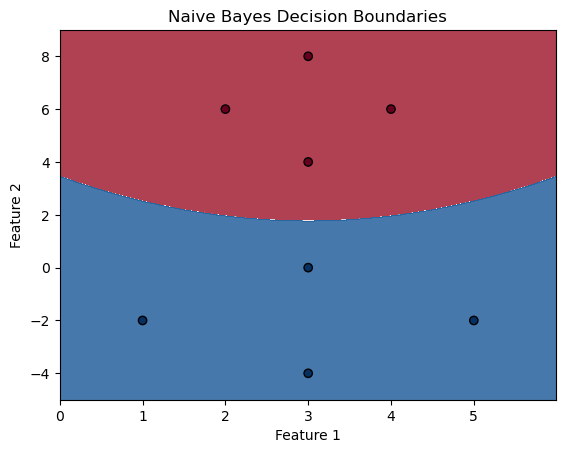

In [42]:
plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.8)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.RdBu, edgecolor='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Naive Bayes Decision Boundaries')
plt.show()